<b><big>Comparative Analysis on Supervised Machine Learning Classification Algorithms  (NEURAL NETWORK - TENSORFLOW )</big></b><BR/>
Keras is the high-level API of the TensorFlow platform. It provides an approachable, highly-productive interface for solving machine learning (ML) problems, with a focus on modern deep learning
<h3><b>Task-A.2:</b> The Primary objective of this task is to implement a Neural Network model of Tensorflow Library using Keras API  for predicting the stability of the Electrical Grids based on the 13 features and 1 binary class Label provided in the Electical Grid Stability Simulated Data from UCI Machine Learning repository. Since, effectiveness of neural networks for classification tasks can be justified based on their inherent ability to learn complex patterns and representations from data. Moreover, adaptability of neural networks to various types of data, automatic feature learning, and their capacity to handle large datasets contribute to their applicability in classification tasks.
</h3>

<h4>This involves </h4>
    <ul>
       <li>Data Preprocessing(Data Cleaning,Encoding, Outlier detection),</li>
       <li>Exploratory Data Analysis(EDA), </li>
       <li>Features Selection, </li>
       <li>Training by performing GridSearch CrossValidation with hyperparameters to find the best model,</li>
       <li>Predicting the best model, </li>
       <li>Evaluating the performance using the accuracy, Confusion matrix values - precision, recall,
             </li>
       <li>Classification Report,
    Area Under ROC Curve(AUROC) and </li>
       <li>prooving the accuracy score of both Training and Test data of the  of the best model's n_neighbor</li>
       
   Dataset URL: [Electrical Grid](https://archive.ics.uci.edu/dataset/471/electrical+grid+stability+simulated+data)

In [ ]:
#pip install scikit-learn

<b><h4>Importing Required Packages</h4></b>

In [ ]:
# Importing the Required Libraries.
#NumPy for array. Pandas for DataFrame., MatplotLib  & Seaborn for visualizations.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
#Importing Tensor Flow Library to Experiment Neural Network for this task
import tensorflow as tf
#sklearn.model_selection Package comes with train_test_split function to Split arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split

# To display the plots immediately after the current cell
%matplotlib inline

<b><h4>STEP1: Importing the Electrical Grid Stability Simulated Dataset (DATA LOADING)</h4></b>

In [ ]:
#Data Collection and Loading Dataset into a pandas dataframe
# Importing the dataset
egrid_df = pd.read_csv("electrical_grid_stability_data.csv")

<b><H4>Preliminary Data Exploration </H4></b>

In [ ]:
egrid_df.head()
#Total: 14 columns. 13 features and 1 target Label
#tau1, tau2, tau3, tau4, p1, p2, p3, p4, g1, g2, g3, g4, stab, stabf

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [ ]:
egrid_df.shape
#Shape is 10000 records and 14 columns in the egrid dataframe

(10000, 14)

In [ ]:
egrid_df.info()
#All features are numerical float variables Except the Label column which is categorical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      9999 non-null   float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      9999 non-null   float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      9999 non-null   float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [ ]:
egrid_df.describe()
#Exploring the Statistical information the data such as count, Average that is mean, standard deviation,
#minimum  values, and values of the 3 quartiles Q1, Q2, & Q3(25%, 50% and 75%) and maximum values
#Note That the count is not 10000 in p1, p4 and g4. suspected to have some Missing values in these columns

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,9999.000000,10000.000000,10000.000000,9999.000000,10000.000000,10000.000000,10000.000000,9999.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.749961,-1.250000,-1.250000,-1.250071,0.525000,0.525000,0.525000,0.525036,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752188,0.433035,0.433035,0.432998,0.274256,0.274255,0.274255,0.274245,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218289,-1.624901,-1.625025,-1.625019,0.287521,0.287552,0.287514,0.287564,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.750638,-1.249966,-1.249974,-1.250054,0.525009,0.525003,0.525015,0.525066,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282469,-0.874977,-0.875043,-0.875179,0.762435,0.762490,0.762440,0.762456,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


<b><H3>STEP2: DATA PREPROCESSING</H3>
<H4>STEP2.1: Data Cleaning By Imputing the Missing or Null Values</H4></b>


In [ ]:
#Checking the missing or Null values in the dataframe
egrid_df.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       1
p2       0
p3       0
p4       1
g1       0
g2       0
g3       0
g4       1
stab     0
stabf    0
dtype: int64

In [ ]:
#Exploring and Listing the rows having the null values
egrid_df[egrid_df.isnull().any(axis=1)]

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
31,3.432549,0.944068,3.324771,7.735356,NaN,-1.495949,-1.398690,-1.239985,0.408974,0.392226,0.330909,0.655999,-0.022913,stable
4720,0.532651,2.435607,4.761401,8.815427,4.485146,-1.179958,-1.937847,-1.367341,0.631336,0.122692,0.475210,NaN,-0.026102,stable
7491,9.187005,6.127465,6.418291,4.622644,2.686458,-1.477672,-0.671124,NaN,0.205676,0.907829,0.227058,0.412594,0.034988,unstable


In [ ]:
##Step 2.1: Data Cleaning: Imputing the Missing Values using the SimpleImputer from sklearn.impute library.
#Since the 3 null values of 3 variables p1, p4 and g4, belongs to Numerical datatype
#Hence, Median stratergy is used in the SimpleImputer class in the below code to impute missing

#Imputing by importing and using the SimpleImputer class from sklearn.impute library.
from sklearn.impute import SimpleImputer
# import numpy as np #for specifying the NULL value np.nan
Numerical_Imputer = SimpleImputer(missing_values=np.nan, strategy ="median")
Numeric_Imputer = Numerical_Imputer.fit(egrid_df[["p1","p4","g4"]])
egrid_df[["p1","p4","g4"]] = Numerical_Imputer.transform(egrid_df[["p1","p4","g4"]])
egrid_df.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

#Missing (Null) values are imputed Successfully

<b><h4>Step 2.2: Data Transformation By Encoding the Categorical Datatype variables to Numeric Datatype</h4></b>

In [ ]:
##Data Encoding: Changing Categorical Data Type into Numerical Data Type Variables
#Data Encoding on the Categorical Target variable "stabf".
#Let's find the unique valuesin it
egrid_df['stabf'].unique()


array(['unstable', 'stable'], dtype=object)

These are only two categorical values <b>'unstable', 'stable'</b> in the Target column

In [ ]:
egrid_df['stabf'] = egrid_df['stabf'].replace(['stable','unstable'],[1,0])

<b><H4>STEP2.3: Outlier Detection in the Dataset </H4></b>

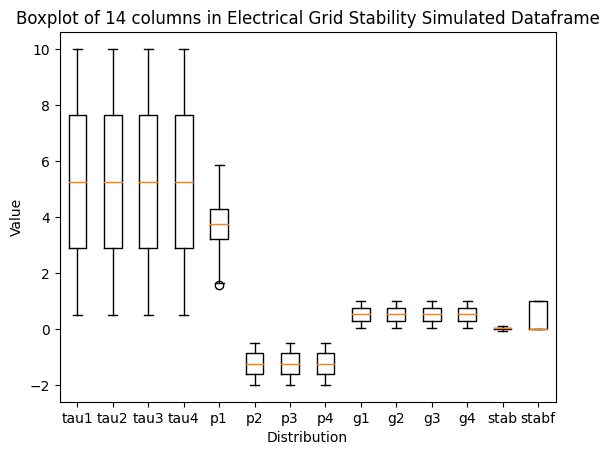

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(x=(egrid_df['tau1'], egrid_df['tau2'], egrid_df['tau3'], egrid_df['tau4'], egrid_df['p1'], egrid_df['p2'], egrid_df['p3'], egrid_df['p4'], egrid_df['g1'], egrid_df['g2'], egrid_df['g3'], egrid_df['g4'], egrid_df['stab'], egrid_df['stabf']))

# Setting x-axis labels
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], ['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2', 'g3', 'g4', 'stab', 'stabf'])

# Setting title, xlabel, and ylabel directly on fig1
plt.title("Boxplot of 14 columns in Electrical Grid Stability Simulated Dataframe")
plt.xlabel('Distribution')
plt.ylabel('Value')
plt.show()



<H4><b>Analysis: No Outliers exist in the Electrical Grid dataset</H4>

<b><H4>STEP2.4: DATA EXPLORATION:Exploratory data analysis (EDA)</H4></b>

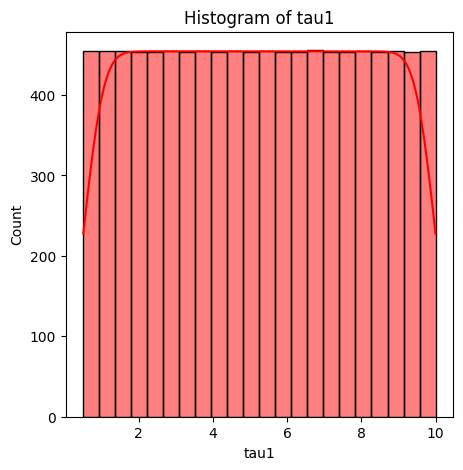

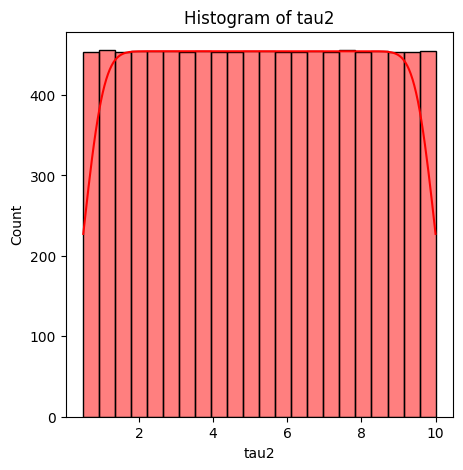

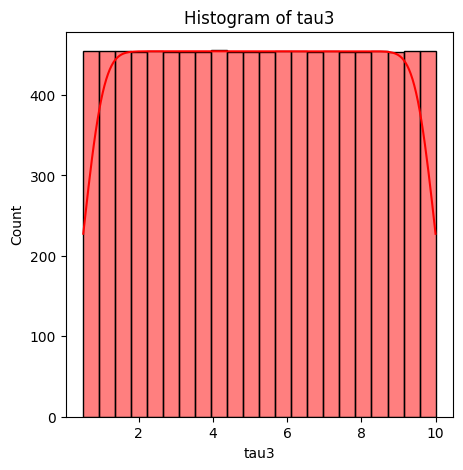

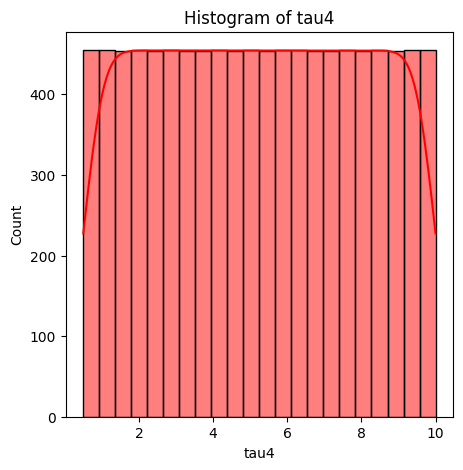

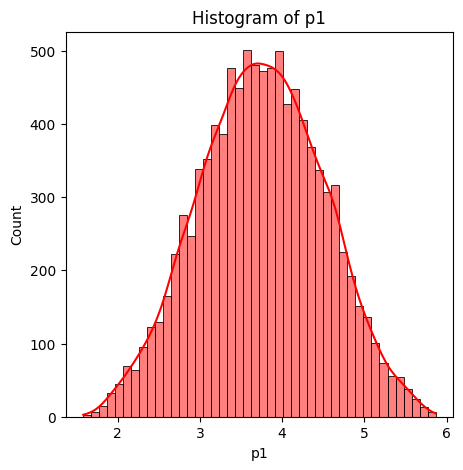

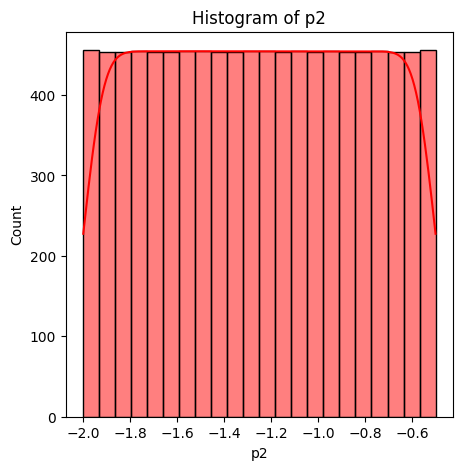

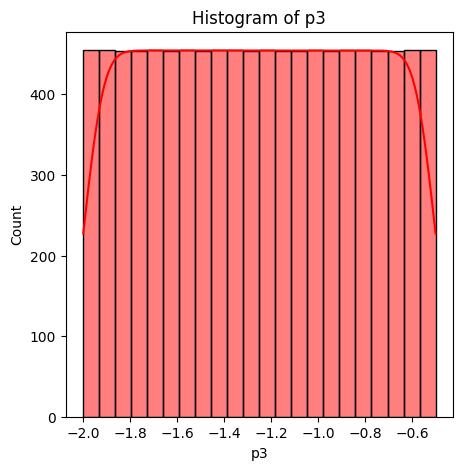

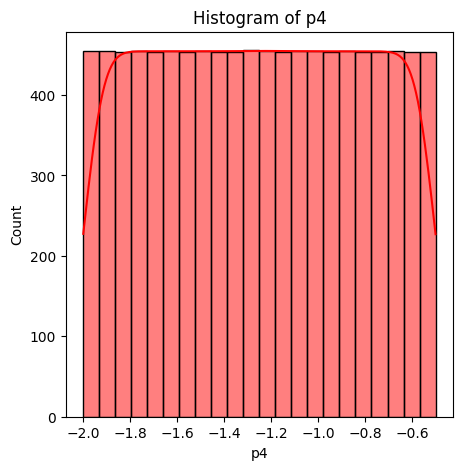

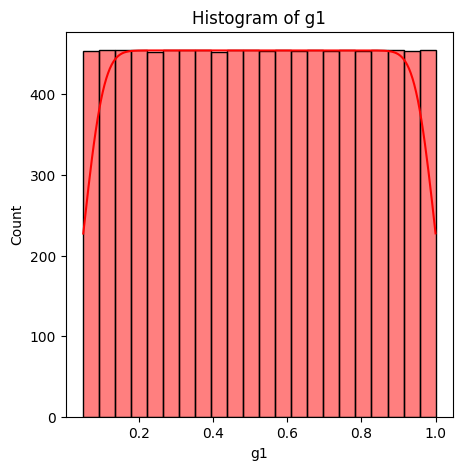

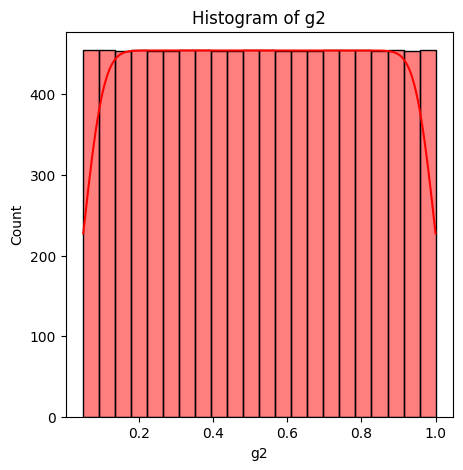

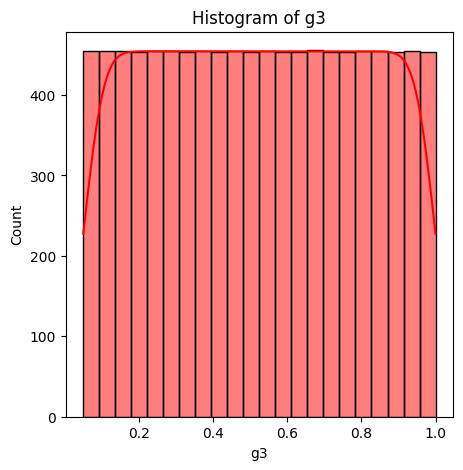

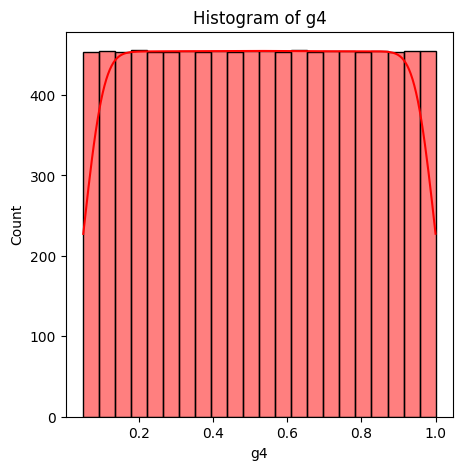

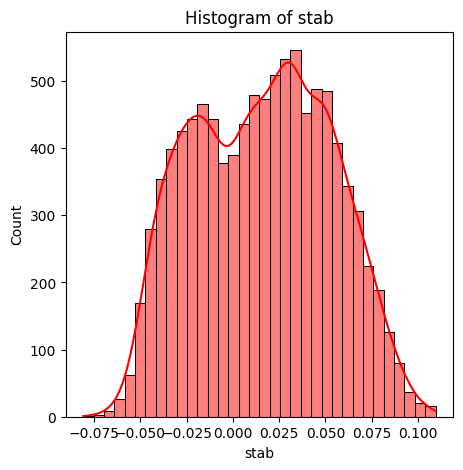

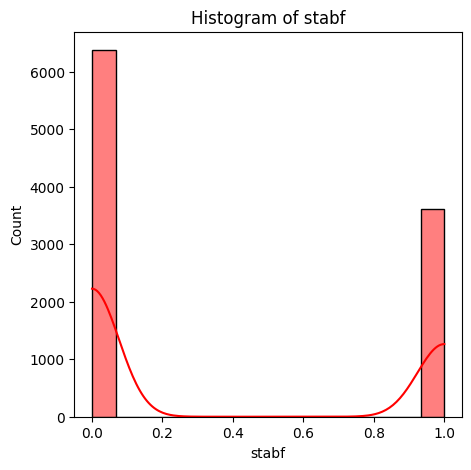

In [ ]:
#Data Exploration by plotting the histogram for each variables in the dataframe
#STEP2.4.1: Univariate Data Exploration
#the "kde" parameter of the histplot is set to true to add a curve representing the kernel density estimate of the data, calculated with the default parameters of the kde plot function.
import matplotlib.pyplot as plt
egrid_df_columns = egrid_df.columns
for col in egrid_df_columns:
    plt.figure(figsize=(5, 5))
    sb.histplot(egrid_df[col], kde = True, color='r')
    plt.title(f'Histogram of {col}')
    plt.show()
#Data Distribution of Almost All columns are Uniformly or Normaly distributed except the Label data since it is categorical data

<b>Analysis:<br/>p1 data is normally distributed with bell-shapped curve<br/>
but, p2,p3 and p4 column data are Uniformly distributed <br/>
4 columns of tau(x) data are Uniformly distributed <br/>
4 columns of g(x) data are Uniformly distributed <br/>
stab column data shows a Multimodal distribution <br/>
stabf column data shows a Bimodal distribution due to categorical data stable and unstable<br/>
</b>

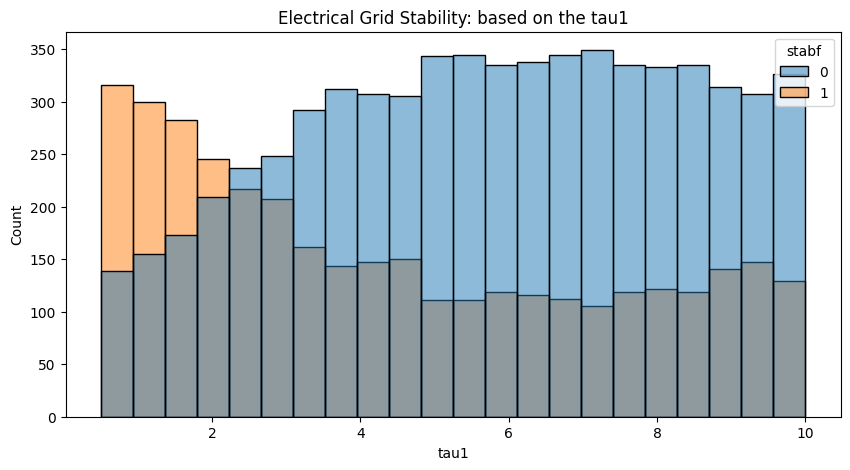

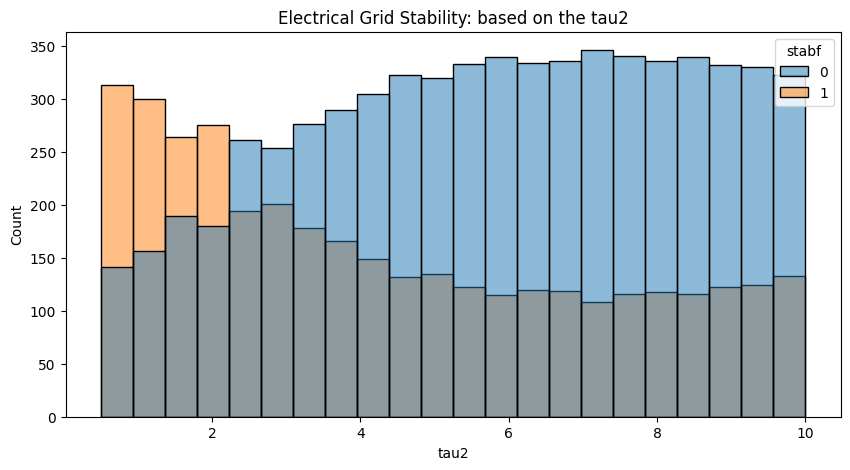

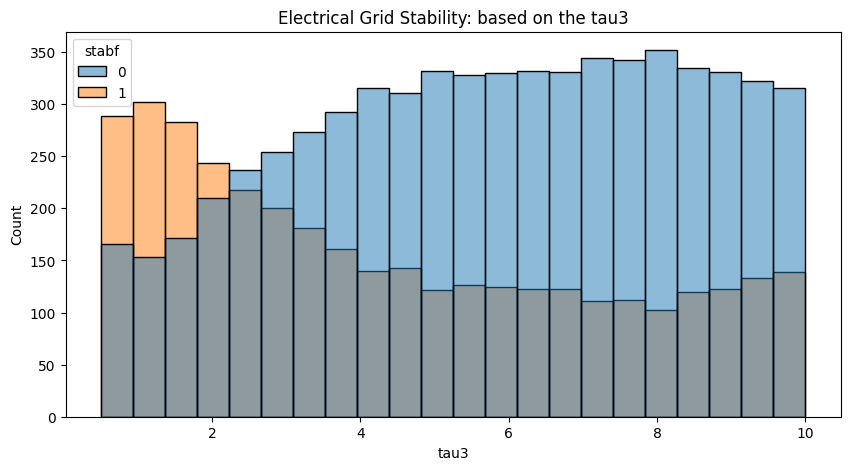

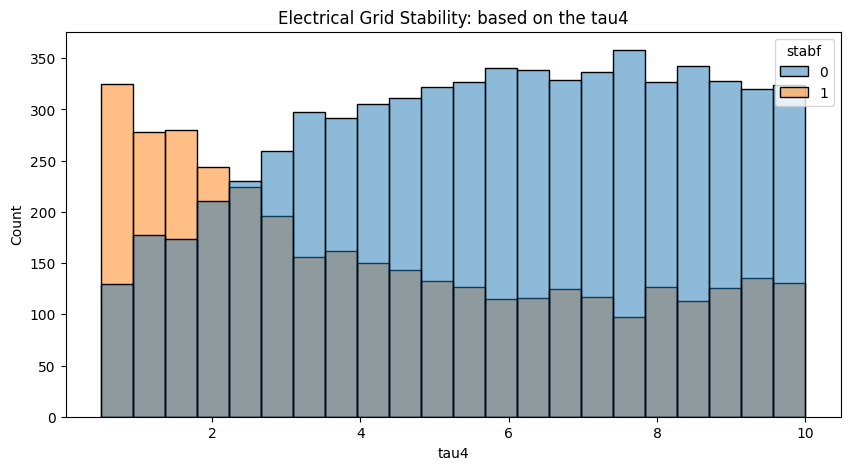

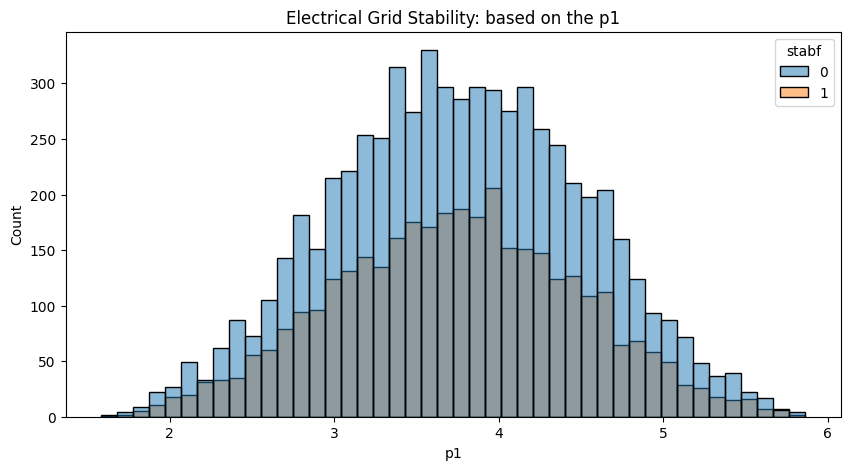

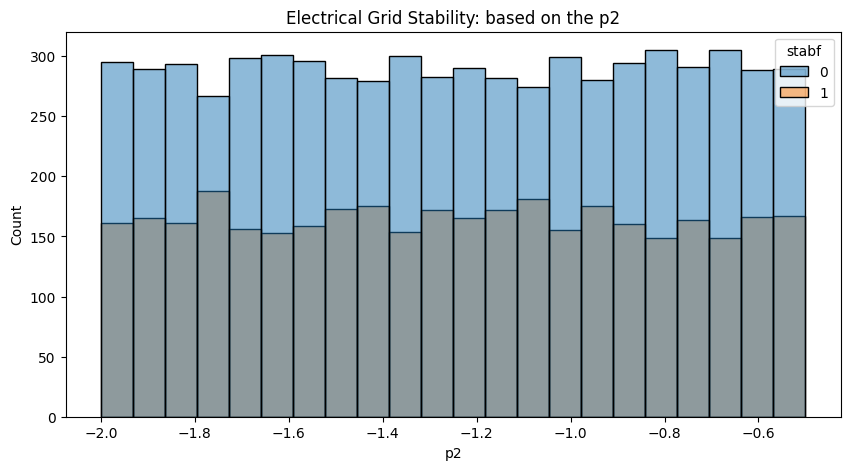

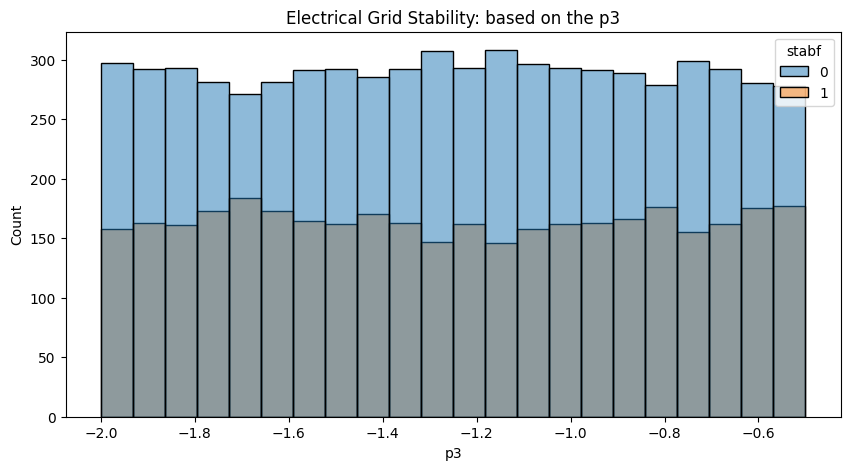

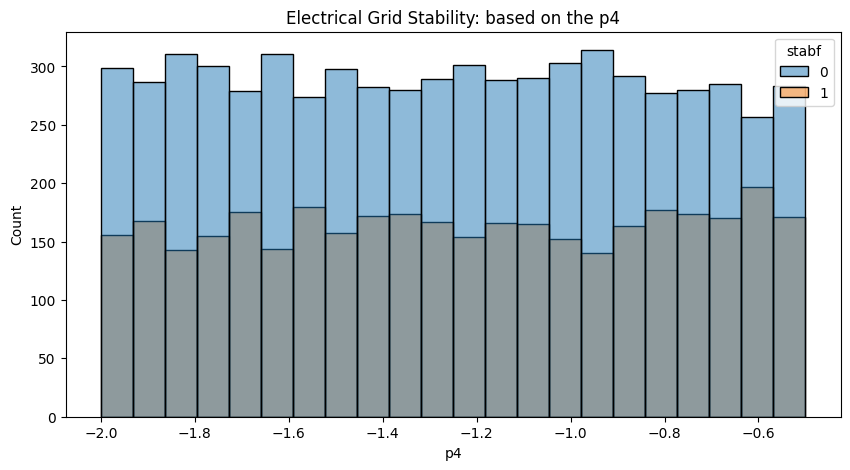

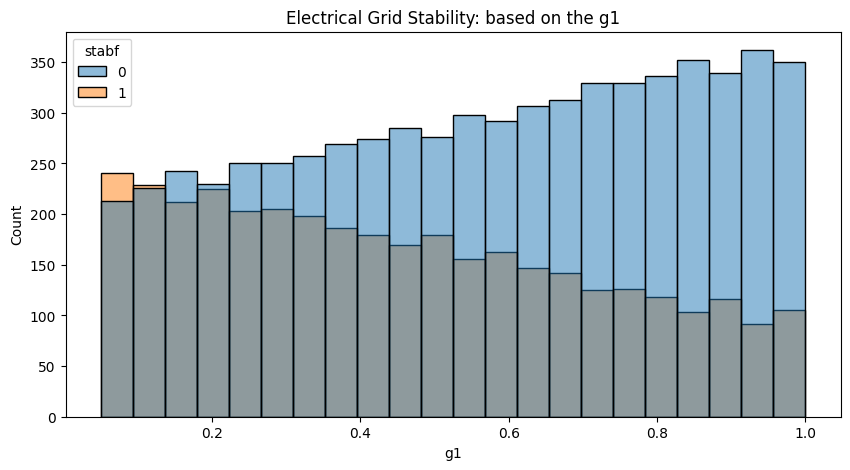

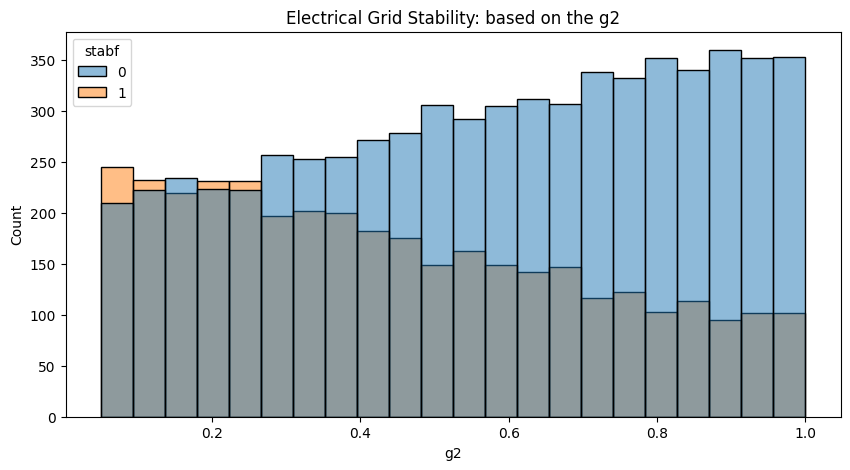

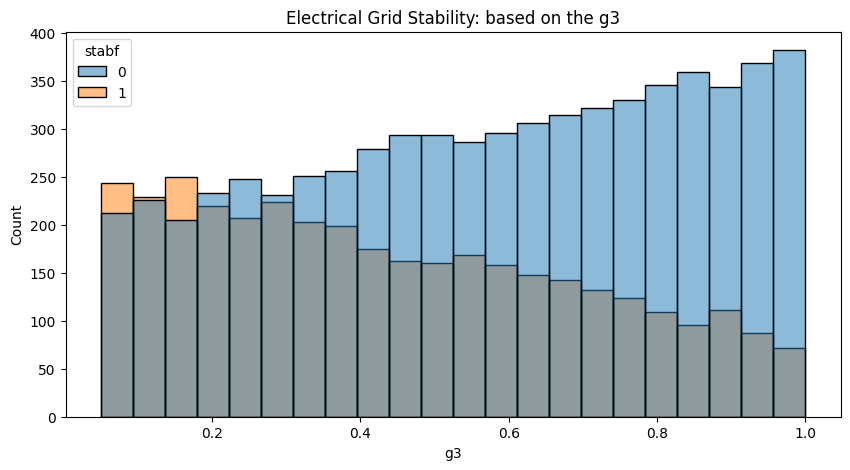

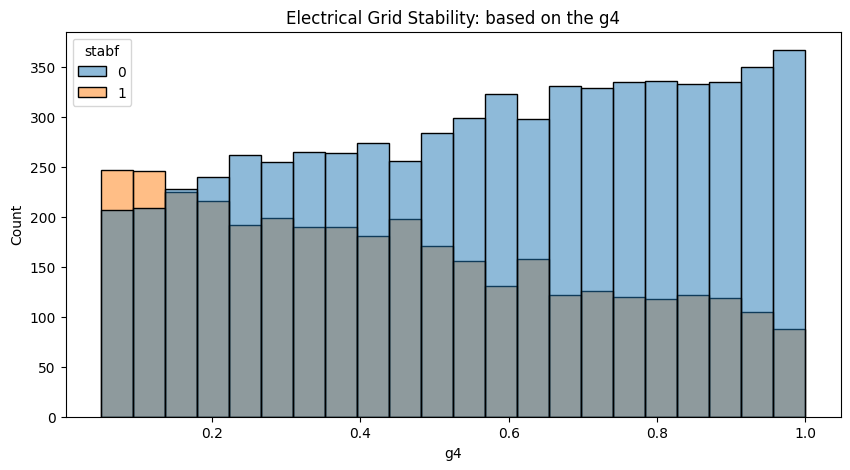

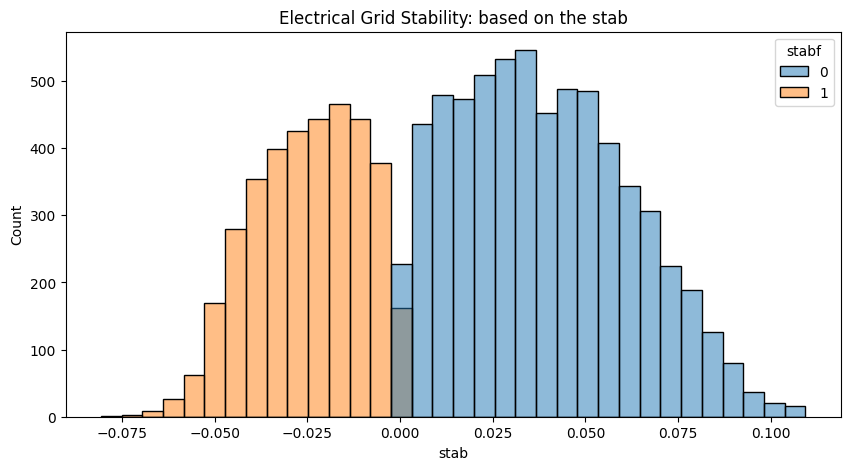

In [ ]:
#STEP2.4.2: Bivariate Data Exploration of all 13 features with the Label 'stabf' through histogram
# Exploring to uncover some important data Patterns of the Electrical Grid Stability Data dataset based on the 13 features namely:'tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4',
#'g1', 'g2', 'g3', 'g4', 'stab' to show how they impact the occupancy Ratio
features1 = ['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2', 'g3', 'g4', 'stab']
for i in features1:
    plt.figure(figsize=(10,5))
    plt.title("Electrical Grid Stability: based on the "+ i)
    sb.histplot(x=i, hue="stabf", data=egrid_df)
    plt.show()

 <b> Analysis:<br/>
  tau(x): there is more stability when the tau(X) variables are around value 2<br/>
  p1: there is hightest stability when the tau(X) variables are around value 4 <br/>
  p2,p3,p4: the possibility of stability is uniform within the range of -2.0 and -0.6 <br/>
  g(x): The stability rate is more for g(x) when value of each is<br/>
  For g1 value is between 1.8 and 2<br/>
  For g2 value is between 1.8 and 2.2<br/>
  For g3 value is between 1  and 3<br/>
  For g4 value at 1.8<br/></b>

<b> <h4>Evaluating and Visualizing the Correlation Coefficients between all 14 variables of the Dataset using Scatterplot and Heatmap</h4></b>

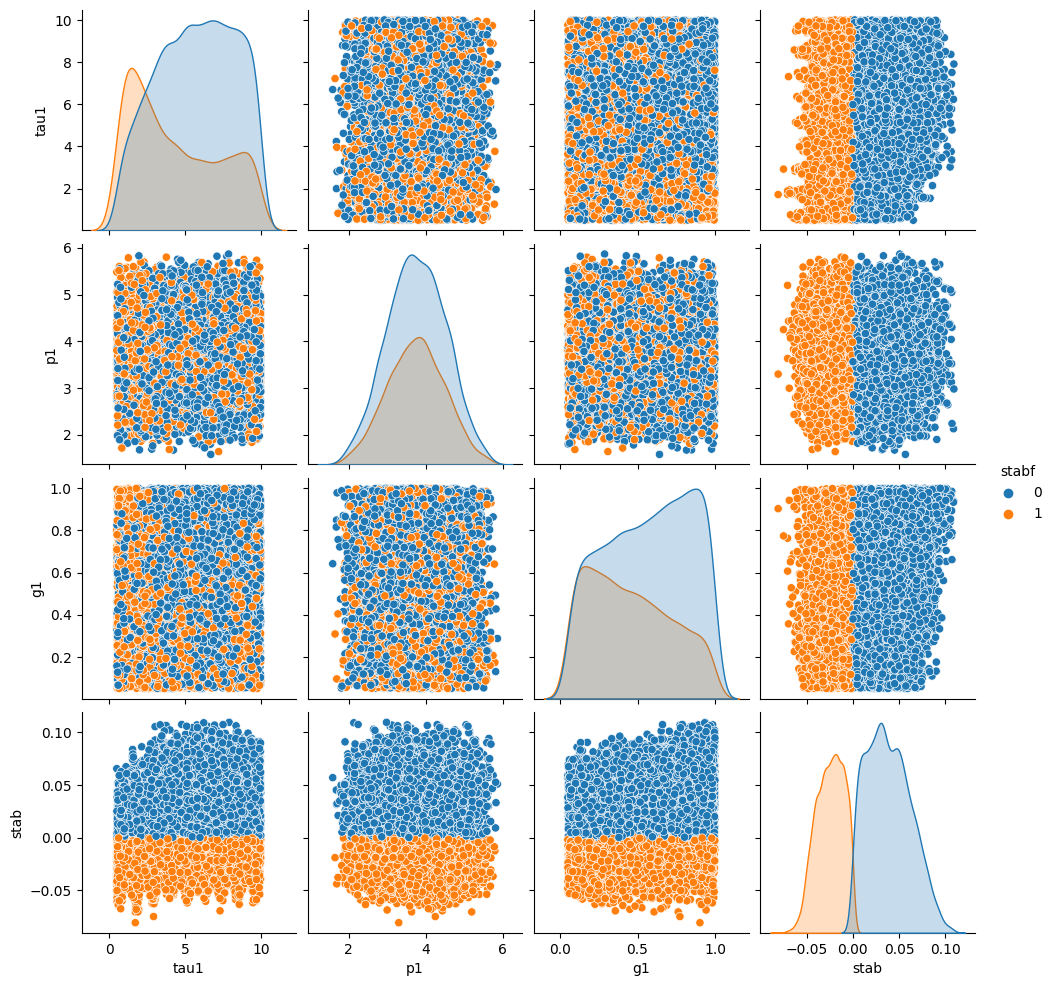

In [ ]:
#Scatteplot using Seaboen to visualiza the specific main features out of 13 features. #main 4 features: tau1, p1, g1 and stab, with 'stabf' label
required_cols = ['tau1', 'p1', 'g1', 'stab','stabf']
sb.pairplot(data=egrid_df[required_cols], hue='stabf')

In [ ]:
#STEP2.4.3: Evaluating the Correlation Coefficients between the Label('stabf') and 13 features of the ElectricGrid Dataset
egrid_df.corr()['stabf'].sort_values(ascending=False).round(9)

stabf    1.000000
p4       0.022912
p3       0.000649
p2      -0.006173
p1      -0.010006
g1      -0.197664
g4      -0.204774
g2      -0.217341
g3      -0.231774
tau1    -0.234898
tau3    -0.237492
tau4    -0.239375
tau2    -0.246280
stab    -0.826959
Name: stabf, dtype: float64

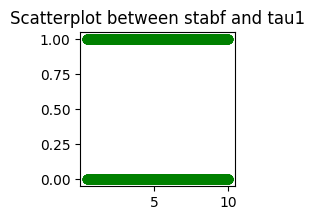

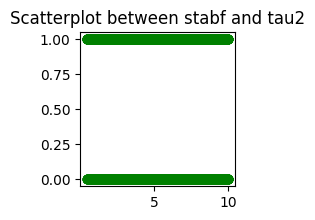

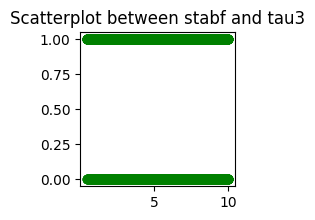

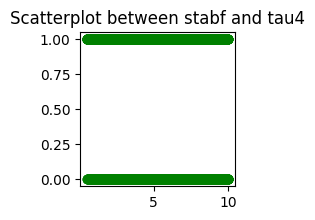

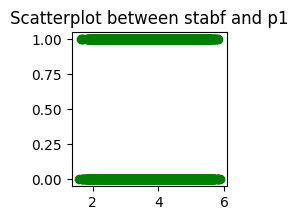

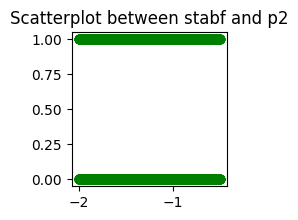

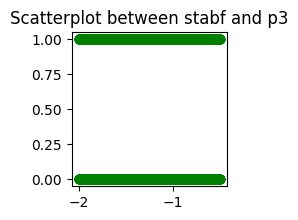

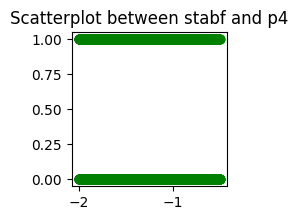

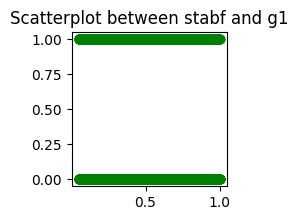

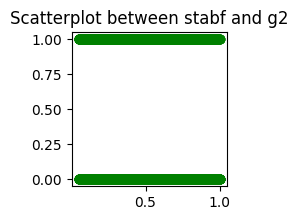

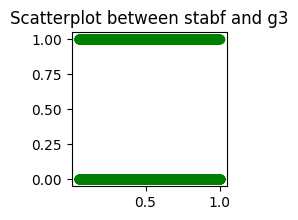

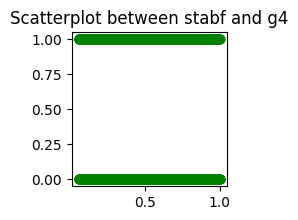

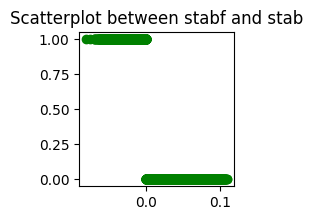

In [ ]:
#STEP2.4.4:Bivariate Data Exploration of all 13 features to explore their Correlation Coefficient trough Scatterplot
#sb.pairplot(egrid_df.corr())
features1 = ['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2', 'g3', 'g4', 'stab']
#features1 = egrid_df.columns()
for col in features1:
    plt.figure(figsize=(2,2))
    plt.scatter(egrid_df[col],egrid_df['stabf'],color = 'g')
    plt.title('Scatterplot')
    plt.title("Scatterplot between stabf and "+ col)
    plt.show()



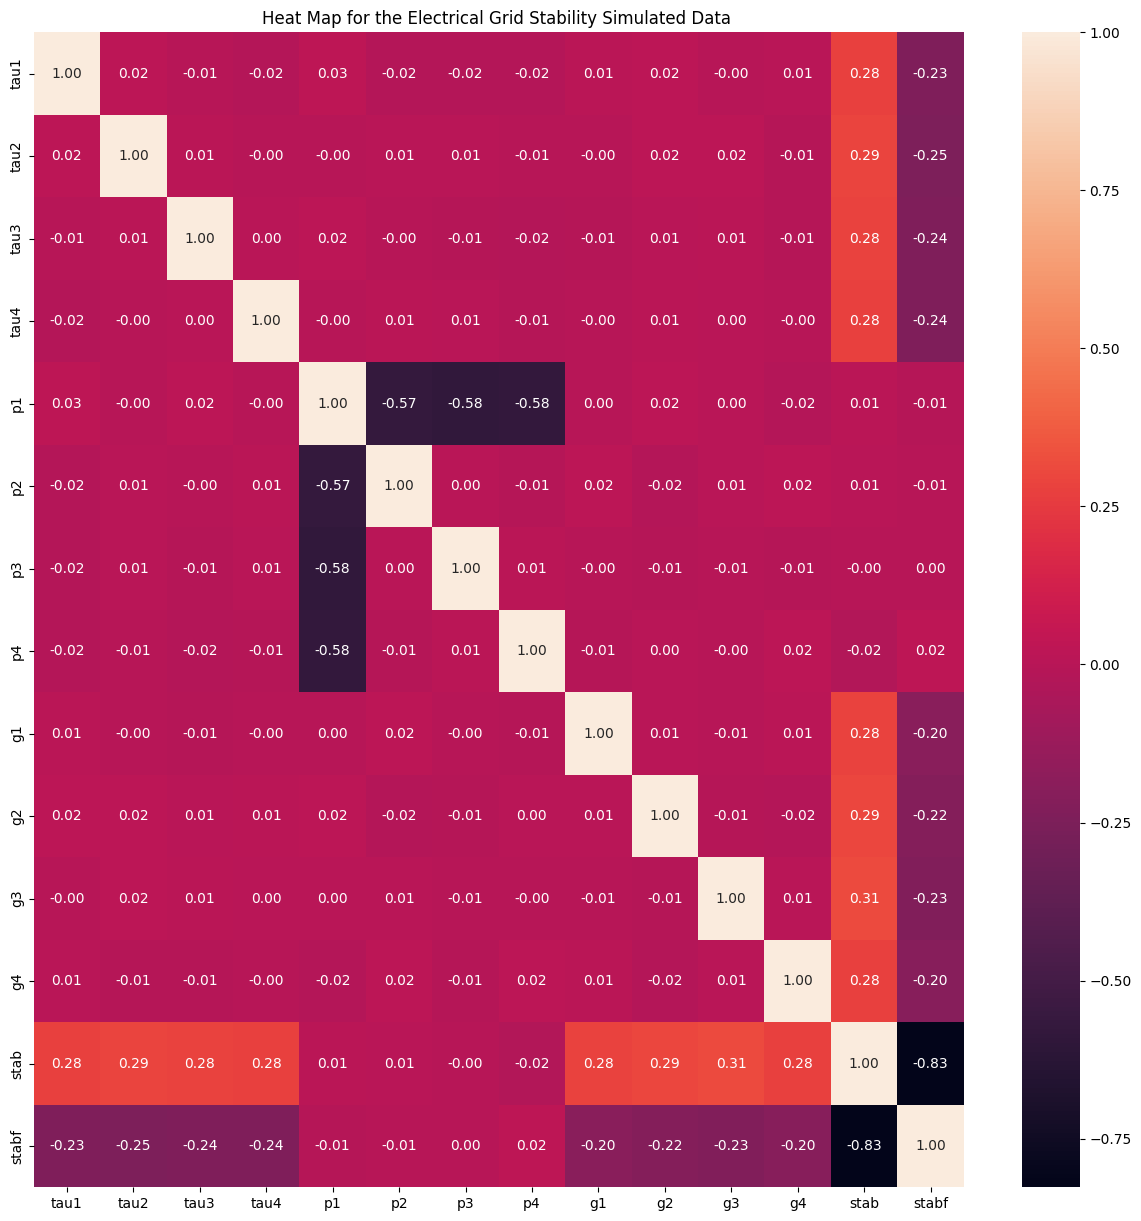

In [ ]:
#STEP2.4.5: Implementing Multivariate Data Exploration through heatmap for exploring Corralation Coeffients insightfully
#Generating the Heatmap to Visuallize the Corralation Coeffients of all 14 variables
plt.figure(figsize=(15,15))
corr_matrix = egrid_df.corr().round(4)
sb.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title("Heat Map for the Electrical Grid Stability Simulated Data ")
plt.show()

<b>Analysis:<br/>
With respect to the target "stabf":<br/>
"stab": maximal real part of the characteristic equation root  is the most negatively correlated to the label "stabf" <br/>

tau(x) : The 4 time constants or time delays which reveals the reaction time of the participant is negatively correlated  to the label "stabf".<br/>
g(x): the (gamma) coefficient  proportional to price elasticity is negatively correlated to the label "stabf"<br/>
p(x): The nominal power  is very weakly correlated to the label "stabf"
<br/></b>



<H4>STEP2.5: FEATURE ENGINEERING:  Performing Feature Selection </H4>

In [ ]:
#Feature selection
X = egrid_df.drop('stabf', axis=1)
Y = egrid_df['stabf']
Y.head()

0    0
1    1
2    0
3    0
4    0
Name: stabf, dtype: int64

In [ ]:
#STEP2.6: Splitting the dataset into the Training set and the Test set using the train_test_split() method of sklearn.model_selection python package

#sklearn.model_selection Package comes with train_test_split function to Split arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, stratify=Y, random_state=0)

<Axes: xlabel='stabf', ylabel='count'>

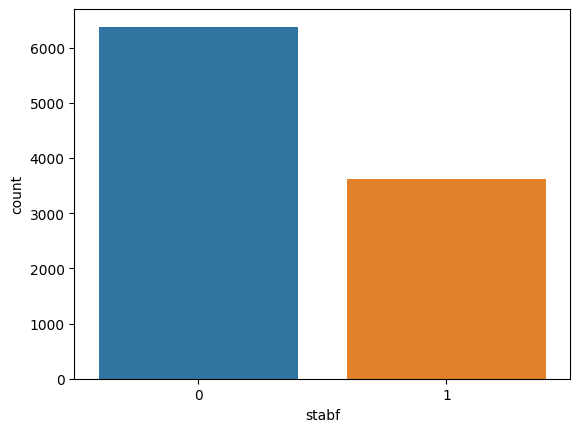

In [ ]:
#Below countplot is used to visually prove that the Target Class imbalance exist in the Electrical Grid dataset!
#Around 6000 records are unstable class and around 4000 records are stable class
sb.countplot(egrid_df, x ="stabf")

**Random undersampling perfomed to address the Class imbalance in the Target Label. Random Under sampling** involves randomly selecting examples from the majority class and deleting them from the training dataset. In the random under-sampling, the majority class instances are discarded at random until a more balanced distribution is reached

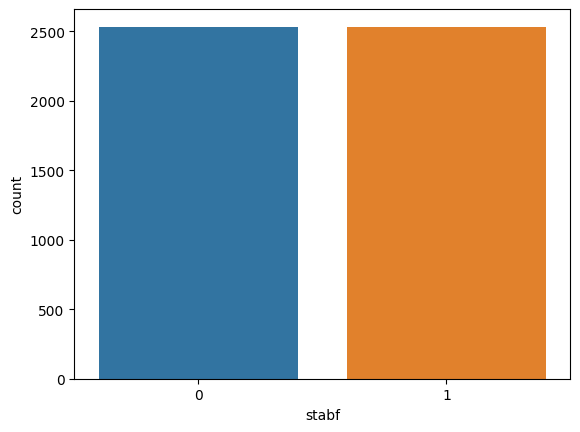

In [ ]:
#RandomUnderSampler class of imblearn.under_sampling python package is used to perform the randome under sampling, which will
#Under-sample the majority class(es) by randomly picking samples with or without replacement. Thus, equalize the count of occurances of both classes w.r.to minority one
from imblearn.under_sampling import RandomUnderSampler
eg_resampler = RandomUnderSampler(random_state=0)
X_train_undersampled, y_train_undersampled = eg_resampler.fit_resample(X_train, y_train)
sb.countplot(x =y_train_undersampled)
y_train = y_train_undersampled

In [ ]:
#Step2.7: Scaling the features using the MinMaxScaler class of sklearn.preprocessing python packa ge to get non negative value for further processing
##c) Scaling features for Standardization using MinMaxScaler is for getting non negative value for selectKbest  for feature Engineering
from sklearn.preprocessing import MinMaxScaler
minmaxsc  = MinMaxScaler()
#Fitting the MinMaxscaler instance to the training under sampled data
X_train_s = minmaxsc.fit_transform(X_train_undersampled)
#Then, Scaling the Test data using the fitted MinMaxscaler instance
X_test_s = minmaxsc.transform(X_test)


<p align='justify'><b><h3>
TaskA.2 : Experimented by training Models using Neural Network model of the Tenserflow Library using Keras API for predicting the stability of the Electrical Grids based on the 13 features and 1 binary class Label provided in the Electrical Grid Stability Simulated Data from UCI Machine Learning repository<br/></b></h3>
<h3>
<b>Two experiments implemented using Tensorflow Neural Network Model. They are PartA and PartB:<br/>
Part-A Objective: Training the Network model-model with 13 features and Evaluating</b></h3>

<h3><b>Part-B Objective: Objective B. Building and Training Another Neural Network model instance by 1) reducing 13 to 4 features (using SelectKBest algorithm/method), 2) Increased Hidden Layers and 3)Increased Epochs values for improving the Neural Network model's performance in predicting the stability  of the Electrical Dataset</b></h3></p>


<h3><b>Part-A: Training the Tensorflow's Network Model with 13 features and Evaluating.</b></h3>

In [ ]:
#STEPA.1: IMPORTING AND INSTANTIANG a Tensorflow class object instance for implementing the Neural network model.
#Importing Tensor Flow Library to Experiment Neural Network for this task
import tensorflow as tf

#In the input layer, input_shape is set as 13 since all 13 features are used. But its hidden layer is specified as 13
#since, when multiplying 13 by 2 and divided by 2 => gives 13 (Becaz, the label is having binary class hence divided by 2)  . (13*2/2 = 13)
nnk_model = tf.keras.models.Sequential()
nnk_model.add(tf.keras.layers.Dense(13,activation='relu',input_shape=(13,)))
nnk_model.add(tf.keras.layers.Dense(2,activation='sigmoid'))


<b>The activation for input layer is set as "relu". But "sigmoid" is used as output layer's activation parameter since the Target is binary classification </b>

In [ ]:
#STEPA.2: Compiling the Neural network Model
nnk_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
#here,  'adam' optimizer is chosen for optimization during the training process. and loss parameter is set to 'sparse_categorical_crossentropy'
#with 'accuracy' requirement as metric

In [ ]:
#STEPA.3: Summarizing the Layer, output and Parameter details of the Neural network Model after compilation
nnk_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13)                182       
                                                                 
 dense_1 (Dense)             (None, 2)                 28        
                                                                 
Total params: 210 (840.00 Byte)
Trainable params: 210 (840.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<b>Training the Tensorflow's Neural Network Model  </b>

In [ ]:
#STEPA.4: Training the Tensorflow's Neural Network Model
#Class_weight needless to be specified since the target class imbalance being addressed or equlaized by Random Under Sampling
history = nnk_model.fit(X_train_s, y_train, \
                    batch_size = 32, epochs= 100, \
                    verbose=2, validation_split=0.2)

Epoch 1/100
127/127 - 5s - loss: 0.6651 - accuracy: 0.5979 - val_loss: 0.9791 - val_accuracy: 0.0690 - 5s/epoch - 40ms/step
Epoch 2/100
127/127 - 0s - loss: 0.5931 - accuracy: 0.6549 - val_loss: 0.9382 - val_accuracy: 0.1144 - 368ms/epoch - 3ms/step
Epoch 3/100
127/127 - 0s - loss: 0.5094 - accuracy: 0.7519 - val_loss: 0.6505 - val_accuracy: 0.6193 - 363ms/epoch - 3ms/step
Epoch 4/100
127/127 - 0s - loss: 0.4147 - accuracy: 0.8604 - val_loss: 0.5387 - val_accuracy: 0.7574 - 371ms/epoch - 3ms/step
Epoch 5/100
127/127 - 1s - loss: 0.3341 - accuracy: 0.9090 - val_loss: 0.4057 - val_accuracy: 0.8915 - 503ms/epoch - 4ms/step
Epoch 6/100
127/127 - 1s - loss: 0.2769 - accuracy: 0.9302 - val_loss: 0.3489 - val_accuracy: 0.9132 - 529ms/epoch - 4ms/step
Epoch 7/100
127/127 - 1s - loss: 0.2372 - accuracy: 0.9487 - val_loss: 0.3446 - val_accuracy: 0.8826 - 558ms/epoch - 4ms/step
Epoch 8/100
127/127 - 1s - loss: 0.2080 - accuracy: 0.9524 - val_loss: 0.2659 - val_accuracy: 0.9339 - 559ms/epoch - 4ms

<b><h4>Evaluating the Neural Network for Electrical Grid Dataset</h4></b> <b> by Plotting the Training Accuracy and Validation Accuracy metrics </b>

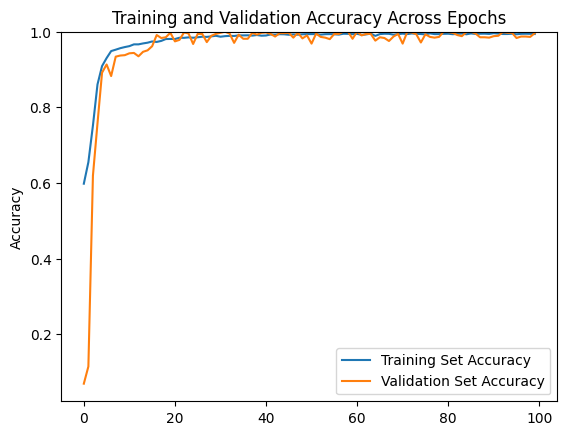

In [ ]:
#STEPA.5: Evaluating the Neural Network for Electrical Grid Dataset BY Plotting the Training Accuracy and Validation Accuracy metrics of the Neural Network Model to evaluate its performance.
nnk_model_accuracy = history.history['accuracy']
nnk_modelmodel_validation_accuracy = history.history['val_accuracy']
plt.plot(nnk_model_accuracy, label='Training Set Accuracy')
plt.plot(nnk_modelmodel_validation_accuracy, label='Validation Set Accuracy')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

<p align='justify'><b> In the above plot both validation and training Accuracy have a consistent upward trend across the epochs indicating effective learning and generalization of the neural network.Also, the convergence of training and accuracy validation exhibits that this NN model is learning from training data and will avoid overfitting and therefore will perform well on unseen data.
<br/>
We can also plot the training and validation loss using the below code.</p>

<b>Plotting the Training Loss and Validation Loss metrics</b>

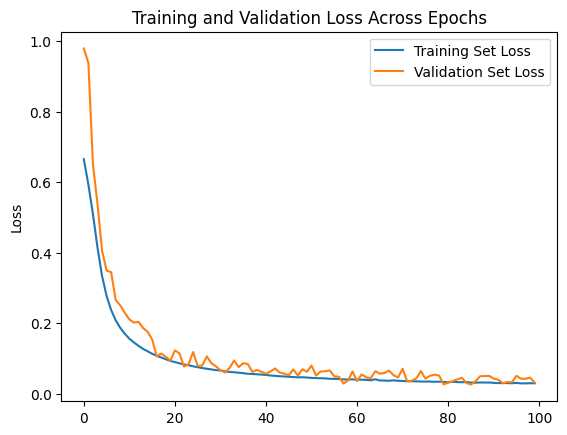

In [ ]:
#STEPA.6: Plotting the Training Loss and Validation Loss metrics of the Neural Network Model to evaluate its performance.
nnkmodel_history_loss = history.history['loss']
nnkmodel_validation_loss = history.history['val_loss']
plt.plot(nnkmodel_history_loss, label='Training Set Loss')
plt.plot(nnkmodel_validation_loss, label='Validation Set Loss')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Across Epochs')
plt.legend()


<p align='justify'><b>The above plotted graph depicts a consistent downward trend in both training and validation loss across epochs, indicating effective learning and generalization of the neural network.  Here, the validation loss tries to align and converge with training loss roughly at many random points and remains stable does not increase this proves that it will not overfit. This convergence of training and validation loss suggests that the model is learning from the training data while avoiding overfitting, thereby demonstrating its ability to perform well on unseen validation data.  Here, The characteristic shape of this curve shows a steep decrease in loss to start with, and then a more gradual decrease in loss subsequently.
</b></p>

<b>Predicting on the Test data using the Neural Network Model instance</b>

In [ ]:
#StepA.7: Predicting on the Test data using the Neural Network Model instance
y_pred_nnk = nnk_model.predict(X_test_s)
y_pred_nnk = y_pred_nnk.argmax(axis=1)

94/94 [==============================] - 0s 2ms/step


<b> Evaluating the Predictions performance of the trained Neural Network by computing the Accuracy score, Confusion matrix and classification_report</b>

In [ ]:
#STEPA.8: Evaluating the Predictions performance of the trained Neural Network by computing the Accuracy score, Confusion matrix and classification_report
#This is done by comparing & evaluating on the Test Label with Predicted Label using accuracy_score(), confusion_matrix() and classification_report() functions of metrics class
from sklearn import metrics
#STEPA.8.1: Printing the Accuracy
print("Accuracy of the Neural Network Model with 13 features: ", str((metrics.accuracy_score(y_test,y_pred_nnk) * 100).round(2)),"%")
#STEPA.8.2: Printing the Confusion Matrix
confusionMat_nnk1 = metrics.confusion_matrix(y_test,y_pred_nnk)
print(confusionMat_nnk1)
#STEPA.8.3: Printing the Classification Report
classf_rep_nnk1 = metrics.classification_report(y_test,y_pred_nnk)
print(classf_rep_nnk1)

Accuracy of the Neural Network Model with 13 features:  99.7 %
[[1908    6]
 [   3 1083]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1914
           1       0.99      1.00      1.00      1086

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



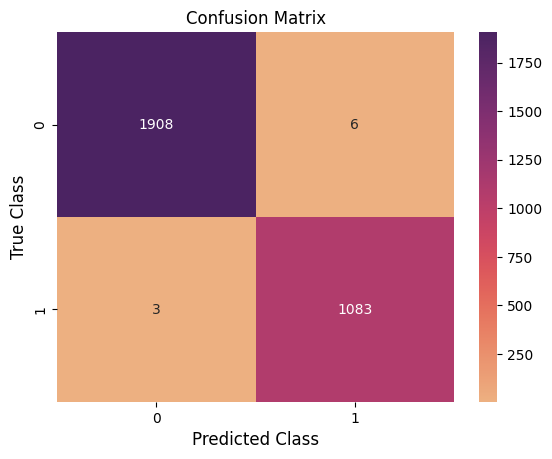

In [ ]:
ax = sb.heatmap(confusionMat_nnk1, cmap="flare", annot=True, fmt="d")
plt.xlabel("Predicted Class", fontsize=12)
plt.ylabel("True Class", fontsize=12)
plt.title("Confusion Matrix", fontsize=12)
plt.show()

In [ ]:
#STEA.8.4: Printing the Individual values of True positive, True Negative, False Positive, false negative from the Confusion matrix
tn, fp, fn, tp = confusionMat_nnk1.ravel()
print("True Positive:The model identified ", tp ,"records as Truly Stable. ")
print("True Negative: The model identified ", tn ,"records as Truly Unstable. ")
print("False Positive: ", fp ,"are instances where the model predicted the positive class (stable) incorrectly. ")
print("False Negative: ", fn ," These are instances where the model predicted the negative class (unstable) incorrectly. ")

True Positive:The model identified  1083 records as Truly Stable. 
True Negative: The model identified  1908 records as Truly Unstable. 
False Positive:  6 are instances where the model predicted the positive class (stable) incorrectly. 
False Negative:  3  These are instances where the model predicted the negative class (unstable) incorrectly. 


<b>Though, the Accuracy is significantly highest value of 99.7%, however the count of False Positive: 6 which is ethically acceptable out of 3000 instances of test data. Favourably, the False negative is 3 </b>

94/94 [==============================] - 0s 2ms/step


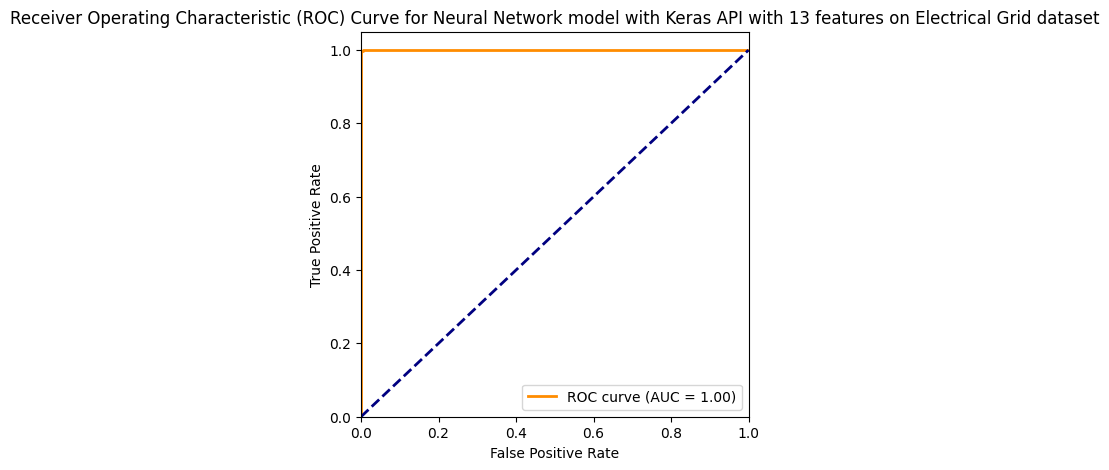

In [ ]:
#STEPA.9:: Computing and Ploting the ROC curve along with the calculated AUC that to display the AUROC Curve
#AUROC-Area Under Receiver Operating Charecteristic Curve. Ref: https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
#roc_curve &  auc  methods of sklearn.metrics are used to find AUC and ROC Values and plotting the same on AUROC graph
from sklearn.metrics import roc_curve, auc
#Predicting the probabilities using the model
y_prob_neural_network = nnk_model.predict(X_test_s)
#Selecting only the positive class probabilities  of the target
y_prob_positive_class = y_prob_neural_network[:, 1]
#Computing the ROC Curve and its AUC
fpr, tpr, thresholds = roc_curve(y_test,y_prob_positive_class)
roc_auc = auc(fpr, tpr)
# Plotting ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Neural Network model with Keras API with 13 features on Electrical Grid dataset')
plt.legend(loc="lower right")
plt.show()

<b>
<b>Above plot shows the highest AUC score of 1.00 which is 100%</b>
<p align='justify'>Though Accuracy is remarkably high with 99.7% and AUC score with 1.00  but the False positive is 6 out of 3000 test records which is acceptable in the perpective of the Ethical consideration, the false. However, false negative is in favourable count, which is 3.
<br/>
Because, the increase in the Precision score,Type I error (False positive) would cause higher threat when the unstable connectivity wrongly predicted and served as stable connectivity to an Industry, which leads to customer Churn and harmful to their business. Because, when an unstable(unbalanced voltage)
electrical connectivity (wrongly prediting as stable) given to industries would lead to higher losses due to machinaries downtime, higher temperature rise of the machinaries, reduction in efficiency and a reduction in developed torque(measure of the force that can cause an object to rotate about an axis).
<br/>
On the other hand,  increase in Recall score will cause Production loss
when a stable current(false negative, Recall) wrongly predicted as unstable and not servimg to required customer is a
production loss to the Electrical Grid company.
<br/>

Thus, aiming to reduce the count of false positve to zero by
1) reducing the  features using SelectKBest featureselection method and
2) including additional hidden layers
3) with increased epochs.</b>
</p>

<b><h3>PARTB: Building and Training Another Neural Network model instance by 1) reducing 13 to 4 features (using SelectKBest algorithm/method), 2) Increased Hidden Layers and 3)Increased Epochs values for improving the Neural Network model's performance in predicting the stability  of the Electrical Dataset</h3>
</b>
<H4><b>STEP1: Implementing the SelectKBest algorithm a Filter based Feature Selection method.<br/>
(Feature selection is a part of Data Preprocessing)</b></H4>

In [ ]:
#STEP1: Implementing the Filter based Feature Selection using the SelectKBest class and f_classif  function since all features are numeric
from sklearn.feature_selection import SelectKBest, f_classif
# Use SelectKBest with the chi-squared test for feature selection
k_best_selector = SelectKBest(f_classif, k=4)
X_train_kbest = k_best_selector.fit_transform(X_train_s, y_train)
X_test_kbest = k_best_selector.transform(X_test_s)

In [ ]:
#Viewing the X_train_kbest to verify the number of columns selected
X_train_kbest[:10]

array([[0.71433047, 0.57286628, 0.30358298, 0.61152789],
       [0.47628779, 0.52276409, 0.81799655, 0.74485441],
       [0.75591155, 0.62966599, 0.04209213, 0.53382426],
       [0.44421988, 0.87269369, 0.84756737, 0.43840085],
       [0.96581378, 0.49242363, 0.08632018, 0.43656828],
       [0.93892635, 0.5611001 , 0.2510648 , 0.49804874],
       [0.6548442 , 0.53076438, 0.55878098, 0.61652774],
       [0.88365677, 0.3032217 , 0.52859302, 0.43012146],
       [0.85759418, 0.94907822, 0.7381564 , 0.59468181],
       [0.64501105, 0.33255218, 0.619321  , 0.71264361]])

In [ ]:
#Verifying which 4 features are selected amoung the 13 features. The columns selected by applying KbestSelector could be found by setting the
#indices parameter totrue in the get_support() function
k_best_selector.get_support(indices=True)

array([ 1,  2,  3, 12])


<b>The array([ 1,  2,  3, 12]) are the features such as tau2,tau3,tau4,stabf </b>

<h4><b>Building and Training the Neural Network for selected 4 features</b></h4>
<b>Now, the input is set to 4 and the hidden is also set to 4 due to the calculation 4*2/2 =4. One more hidden layer is used to fine tune the model to give better performance. Here, "relu" is set for the  activation of input layer while, "sigmoid" is used as output layer activation since the Target is binary classification </b>

In [ ]:
#STEPB.1:Instantiating a Tensorflow Library object instance for building the Neural network model
nnk_model2 = tf.keras.models.Sequential()
nnk_model2.add(tf.keras.layers.Dense(4,activation='relu',input_shape=(4,)))
nnk_model2.add(tf.keras.layers.Dense(3, activation='relu'))
nnk_model2.add(tf.keras.layers.Dense(2,activation='sigmoid'))


In [ ]:
#STEPB.2: Compiling the second Neural network Model with 'adam' optimizer is chosen for optimization  and 'sparse_categorical_crossentropy' as loss funtion during the training process
#with "accuracy" as the required metrics
#nnk_model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy') #'binary_crossentropy'
nnk_model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
#STEPB.3: Summarizing the Layers, output and Parameter details of the secomd Neural network Model after compilation
nnk_model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 3)                 15        
                                                                 
 dense_4 (Dense)             (None, 2)                 8         
                                                                 
Total params: 43 (172.00 Byte)
Trainable params: 43 (172.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<b>Training the second Neural Network  with epochs increased  from 100 to 300</b>

In [ ]:
#STEPB.4: Training the second Neural Network model  with epochs increased  from 100 to 300
#Class_weight needless to be specified since the target class imbalance being addressed or  equlaized by randomunder sampling
history2 = nnk_model2.fit(X_train_kbest, y_train, \
                    batch_size = 32, epochs= 300, \
                    verbose=2, validation_split=0.2)



Epoch 1/300
127/127 - 2s - loss: 0.6357 - accuracy: 0.6344 - val_loss: 0.8226 - val_accuracy: 0.0897 - 2s/epoch - 13ms/step
Epoch 2/300
127/127 - 0s - loss: 0.5553 - accuracy: 0.7272 - val_loss: 0.7329 - val_accuracy: 0.4073 - 407ms/epoch - 3ms/step
Epoch 3/300
127/127 - 0s - loss: 0.4611 - accuracy: 0.8333 - val_loss: 0.5713 - val_accuracy: 0.7574 - 383ms/epoch - 3ms/step
Epoch 4/300
127/127 - 1s - loss: 0.3574 - accuracy: 0.9253 - val_loss: 0.4137 - val_accuracy: 0.8915 - 531ms/epoch - 4ms/step
Epoch 5/300
127/127 - 1s - loss: 0.2647 - accuracy: 0.9618 - val_loss: 0.3239 - val_accuracy: 0.9181 - 563ms/epoch - 4ms/step
Epoch 6/300
127/127 - 1s - loss: 0.1993 - accuracy: 0.9753 - val_loss: 0.2301 - val_accuracy: 0.9684 - 564ms/epoch - 4ms/step
Epoch 7/300
127/127 - 1s - loss: 0.1583 - accuracy: 0.9798 - val_loss: 0.2126 - val_accuracy: 0.9497 - 569ms/epoch - 4ms/step
Epoch 8/300
127/127 - 1s - loss: 0.1319 - accuracy: 0.9832 - val_loss: 0.1441 - val_accuracy: 0.9970 - 540ms/epoch - 4ms

<h4><b>Evaluating the Second Neural Network model for Electrical Grid Dataset</b></h4>
<b>  Plotting the Training Accuracy and Validation Accuracy metrics  </b>

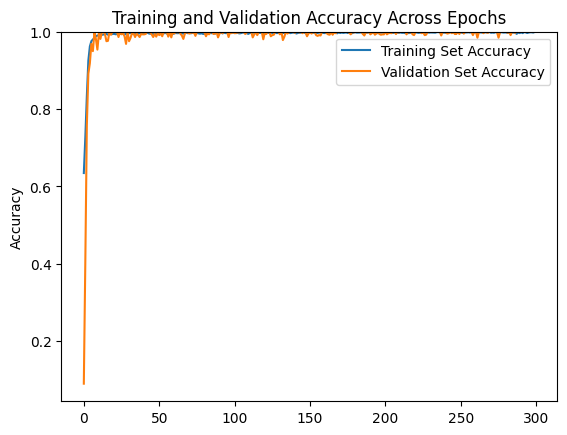

In [ ]:
#STEPB.5: Plotting the Training Accuracy and Validation Accuracy metrics of the Second Neural Network Model to evaluate its performance.
nnk_model_accuracy = history2.history['accuracy']
nnk_modelmodel_validation_accuracy = history2.history['val_accuracy']
plt.plot(nnk_model_accuracy, label='Training Set Accuracy')
plt.plot(nnk_modelmodel_validation_accuracy, label='Validation Set Accuracy')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

<b> In the above plot both validation and training Accuracy have higher consistent upward trend across the epochs  than the previous NN model indicating that this second model has better effective learning and generalization of the neural network. Also, the smooth closer convergence of training and accuracy validation exhibits that this second NN model is learning from training data more better than the first model and will surely avoid overfitting and therefore will perform well on unseen data.
<br/>
We can also plot the training and validation loss using the below code.

<b> Plotting the Training Loss and Validation Loss metrics</b>

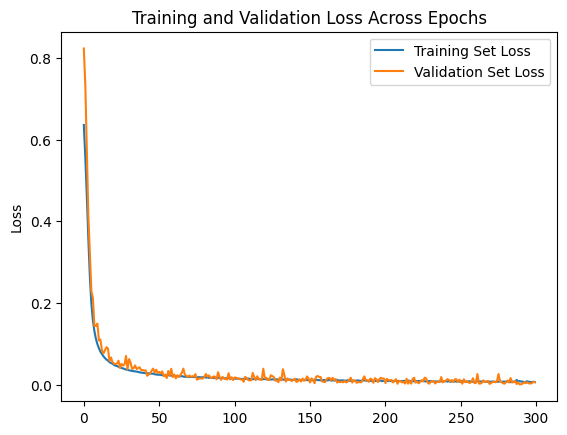

In [ ]:
#STEPB.6: Plotting the Training Loss and Validation Loss metrics of the Second Neural Network Model to evaluate its performance.
nnkmodel_history_loss = history2.history['loss']
nnkmodel_validation_loss = history2.history['val_loss']
plt.plot(nnkmodel_history_loss, label='Training Set Loss')
plt.plot(nnkmodel_validation_loss, label='Validation Set Loss')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Across Epochs')
plt.legend()



<b>The above plotted graph depicts a consistent downward trend and both training loss and validation loss converges closely better than the previous NN model across epochs and remains stable does not increase this proves that it will not overfit.Also, indicates effective learning and generalization of the neural network.<br/>
Therefore, this significant convergence of training and validation loss suggests that the second model is learning from the training data better while avoiding overfitting, thereby demonstrating higher ability to perform well on unseen validation data.  Here, The characteristic shape of this curve shows a steep decrease in loss to start with, and then a more gradual decrease in loss subsequently.
</b>

In [ ]:
#StepB.7: Predicting on the Test data
y_pred_nnk2 = nnk_model2.predict(X_test_kbest)
y_pred_nnk2 = y_pred_nnk2.argmax(axis=1)

94/94 [==============================] - 0s 2ms/step


In [ ]:
#STEPB.8: Evaluating the Predictions performance of the trained Second Neural Network Model on 4 features by computing the accuracy score, Confusion matrix and classification_report
#This is done by comparing & evaluating on the Test Label with Predicted Label using accuracy_score(), confusion_matrix() and classification_report() functions of metrics class
from sklearn import metrics
#STEPB.8.1: Printing the Accuracy for the second NN model
print("Accuracy of the Neural Network Model with 8 features: ", str((metrics.accuracy_score(y_test,y_pred_nnk2) * 100).round(2)),"%")
#STEPB.8.2: Printing the Confusion Matrix for the second NN model
confusionMat_nnk2 = metrics.confusion_matrix(y_test,y_pred_nnk2)
print(confusionMat_nnk2)
#STEPB.8.3: Printing the Classification Report for the second NN model
classf_rep_nnk2 = metrics.classification_report(y_test,y_pred_nnk2)
print(classf_rep_nnk2)

Accuracy of the Neural Network Model with 8 features:  99.87 %
[[1911    3]
 [   1 1085]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1914
           1       1.00      1.00      1.00      1086

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



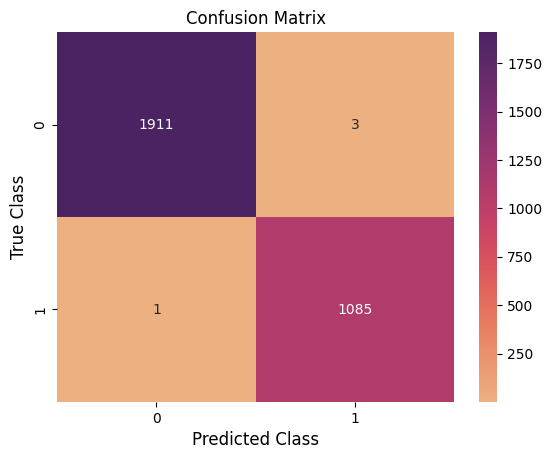

In [ ]:
ax = sb.heatmap(confusionMat_nnk2, cmap="flare", annot=True, fmt="d")
plt.xlabel("Predicted Class", fontsize=12)
plt.ylabel("True Class", fontsize=12)
plt.title("Confusion Matrix", fontsize=12)
plt.show()

In [ ]:
#STEPB.8.5: Printing the Individual values of True positive, True Negative, False Positive, false negative from the Confusion matrix
tn, fp, fn, tp = confusionMat_nnk2.ravel()
print("True Positive:The model identified ", tp ,"records as Truly Stable. ")
print("True Negative: The model identified ", tn ,"records as Truly Unstable. ")
print("False Positive: ", fp ,"are instances where the model predicted the positive class (stable) incorrectly. ")
print("False Negative: ", fn ," These are instances where the model predicted the negative class (unstable) incorrectly. ")

True Positive:The model identified  1085 records as Truly Stable. 
True Negative: The model identified  1911 records as Truly Unstable. 
False Positive:  3 are instances where the model predicted the positive class (stable) incorrectly. 
False Negative:  1  These are instances where the model predicted the negative class (unstable) incorrectly. 


<b>The Accuracy is Amazingly significantly of hightest value of 100% than former model, moreover the  the count of False Positive: 3 which is ethically acceptable since it reduced from 6, out of 3000 instances of test data. Favourably, still the False negative is 1  </b>



<B><H4>Computing and Visualizing AUROC-Area Under Receiver Operating Charecteristic Curve</H4></B>

94/94 [==============================] - 0s 4ms/step


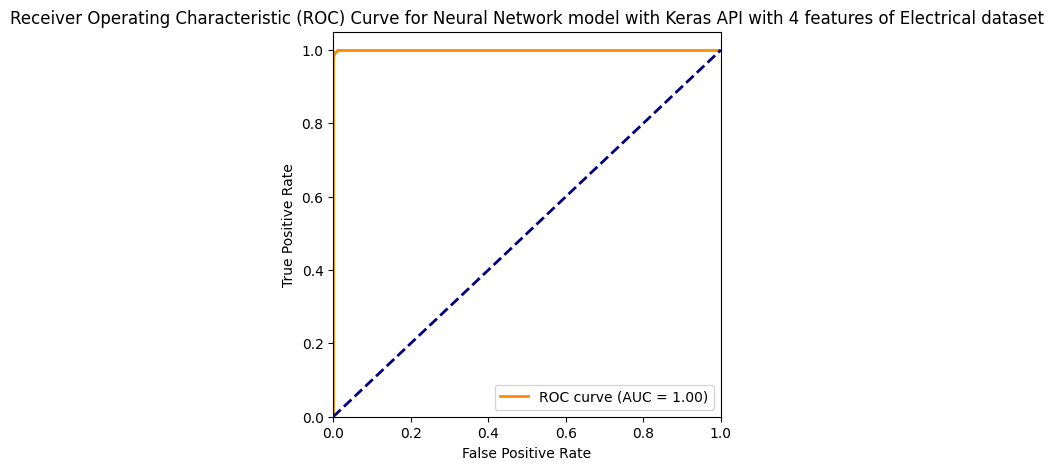

In [ ]:
#STEPB.8.6: Computing and Ploting the ROC curve along with the calculated AUC that to display the AUROC Curve
#AUROC-Area Under Receiver Operating Charecteristic Curve. Ref.: https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
#roc_curve &  auc  methods of sklearn.metrics are used to find AUC and ROC Values and plotting the same on AUROC graph
from sklearn.metrics import roc_curve, auc

#Predicting the probabilities using the model and Selecting only the positive class probabilities of the target
y_prob = nnk_model2.predict(X_test_kbest)[:, 1]
#Computing the ROC Curve and its AUC
fpr, tpr, thresholds = roc_curve(y_test,y_prob)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Neural Network model with Keras API with 4 features of Electrical dataset')
plt.legend(loc="lower right")
plt.show()

<p align='justify'><b>Above plot shows the highest AUC score of 1.00 which is 100%<br/>
Though The Later Neural network model proved to be better improved with highest Accuracy of 100% it gives a benifit of doubt that it could have been over fitter. Also, the False positve count of has decreased from 6 to 3 than the former one inspite of having remarkably highest Accuracy of 100% in additional to highest AUC score of 100%. Nevertheless, the validation-Training Accuracy and Loss graph exhibited a better convergence trying to prove that avoids overfitting still the benifit of overfitting exist with this high rate of convergence.
In conclusion,  Both are good choice for predicting stability. But out of the perfomed 4 Model training including the 2 KNN trained models, the former Neural Network model <big>"nnk_model"</big> trained with 13 features, sigmoid outer layer and 100 epochs seems to be safely a Best choice  for predicting the Stability of Electrical Dataset aliging the ethical considerations of that Electrcity Domain without having the doubt of overfitting</b></p>